# Importing all Packages`

In [1]:
# Import packages

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

import warnings
warnings.filterwarnings("ignore")


In [2]:
employeesData = pd.read_csv('DATASETS/HR_comma_sep.csv') # Loading our dataset into a dataframe

employeesData.head(5) # Lets display first few rows of our dataframe
# 9 independent & 1 depedndent "left"

# a.	Binary	‘work_accident’, 'left', ‘promotion_last_5years’
# b.	Nominal	‘Department’
# c.	Ordinal	‘salary’
# d.	Numerical	'satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company'
# e.	Textual	None


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
employeesData.shape  # 15000 Rows and 10 Columns


(14999, 10)

## Data Preproccessing
### Lets do Data Exploration & Data Cleaning

In [4]:
employeesData.info() #Let us Gather basic information about the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
# Gather descriptive statistics about the data

employeesData.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# Left - 1  Stayed - 0

In [6]:
emoployeeWhoLeft = employeesData[employeesData.left==1]
emoployeeWhoLeft.shape

(3571, 10)

In [7]:
moployeeWhoRetained = employeesData[employeesData.left==0]  
moployeeWhoRetained.shape


# we have more data in employee who stayed

(11428, 10)

### Lets Rename our columns

In [8]:
# Display all column names
employeesData.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [9]:
## We will rename the columns where ever Necessary,  and lets correct any column names that are not spelled correctly,
# and make column names more concise as needed. 

employeesData = employeesData.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})


employeesData.columns # show the names of all columns.

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [10]:
employeesData.head(2)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


In [11]:
 employeesData.isna().sum()  #Lets Check the null values.
# As far as we can tell, our data has no missing values.

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

###  Lets Check for the duplicates in our datasets

In [12]:
# Check for duplicates
employeesData.duplicated().sum() 
# lets examine a few rows that have duplicates.

3008

In [13]:
# 3,008 rows have duplicate data. It accounts for 20% of the data.
# lets examine a few rows that have duplicates when necessary.
employeesData[employeesData.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [14]:
# we can drop the duplcates
# lets drop duplicates and save resulting dataframe in a new variable as needed
employeesDataNew = employeesData.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
employeesDataNew.head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [15]:
employeesDataNew.isnull().sum()  #Checking for the null data

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Lets Check for outliers


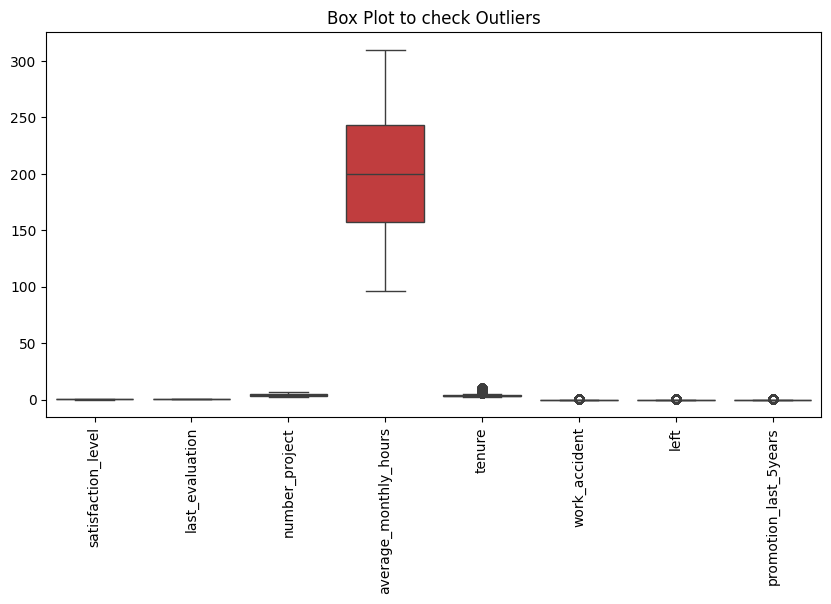

In [16]:
# Lets  plot and check if there are any of the outliers in our data

# selected_columns = ['Amount', 'Class','Time']
plt.figure(figsize=(10, 5))

sns.boxplot(data=employeesDataNew)  # Create box plots all the columns in the DataFrame
plt.title('Box Plot to check Outliers') # graph Title
plt.xticks(rotation=90)
plt.show()


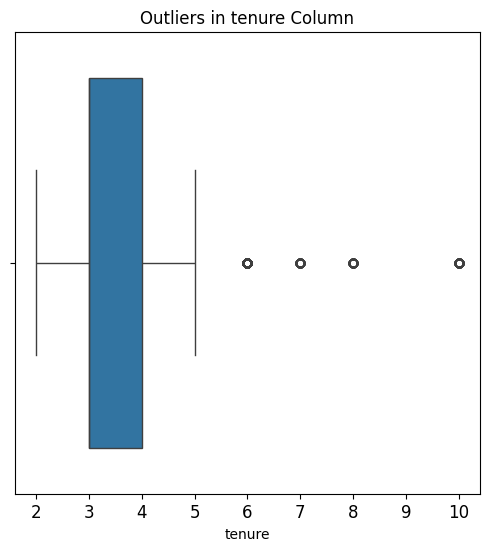

In [17]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Outliers in tenure Column', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=employeesDataNew['tenure'])
plt.show()

In [18]:
# The tenure variable has outliers, as the boxplot above illustrates.
# An investigation into the number of rows in the data that have outliers in the tenure column would be beneficial.

In [19]:
# lets count how many rows have outliers in them. 

percentile25 = employeesDataNew['tenure'].quantile(0.25) # tenure  25th percentile value.
percentile75 = employeesDataNew['tenure'].quantile(0.75) # tenure 75th percentile value.

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25  

 #the upper and lower bounds for non-outlier values.
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

## Determine which subset of the {tenure} data contains outliers.
outliers = employeesDataNew[(employeesDataNew['tenure'] > upper_limit) | (employeesDataNew['tenure'] < lower_limit)]

# Determine the number of rows in the data that have tenure outliers.
print("The count of rows in the data that have tenure outliers", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
The count of rows in the data that have tenure outliers 824


In [20]:
# At this point, we will eliminate the outliers that were previously found  in the tenure column because logistic regression is highly sensitive to outliers.
employeesDataNew = employeesDataNew[(employeesDataNew['tenure'] >= lower_limit) & (employeesDataNew['tenure'] <= upper_limit)]

employeesDataNew.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low


In [21]:
employeesDataNew.shape  # 14999 - 824(outliers) - 3008(duplicates)

(11167, 10)

## Visualisations (analyze relationships between variables)



# Left - 1  Stayed - 0

In [22]:
# numbers of people who left vs. stayed
print(employeesDataNew['left'].value_counts())
print()

# percentages of people who left vs. stayed
print(employeesDataNew['left'].value_counts(normalize=True))


left
0    9285
1    1882
Name: count, dtype: int64

left
0    0.831468
1    0.168532
Name: proportion, dtype: float64


In [23]:

# a stacked histogram distribution of number_project for those who stayed and those who left


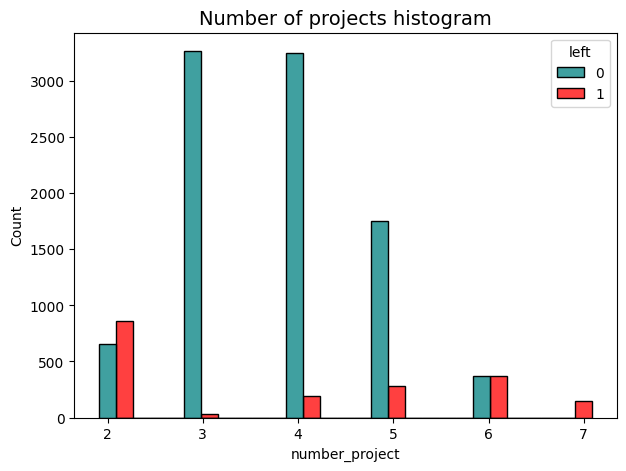

In [24]:
# Set figure and axes
fig, ax = plt.subplots(1, 1, figsize = (7,5))

# Define custom color palette
custom_palette = {0: "teal", 1: "red"}


# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
sns.histplot(data=employeesDataNew, x='number_project', hue='left', multiple='dodge', shrink=2,palette=custom_palette)
ax.set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()




In [25]:
#  with Seven projects , everyone quit the company.

In [26]:
# Get value counts of stayed/left for employees with 7 projects
employeesDataNew[employeesDataNew['number_project']==7]['left'].value_counts()
### this confirms that all employees with 7 projects did leave.

left
1    145
Name: count, dtype: int64



### we will  observe the average monthly hours versus the satisfaction levels.

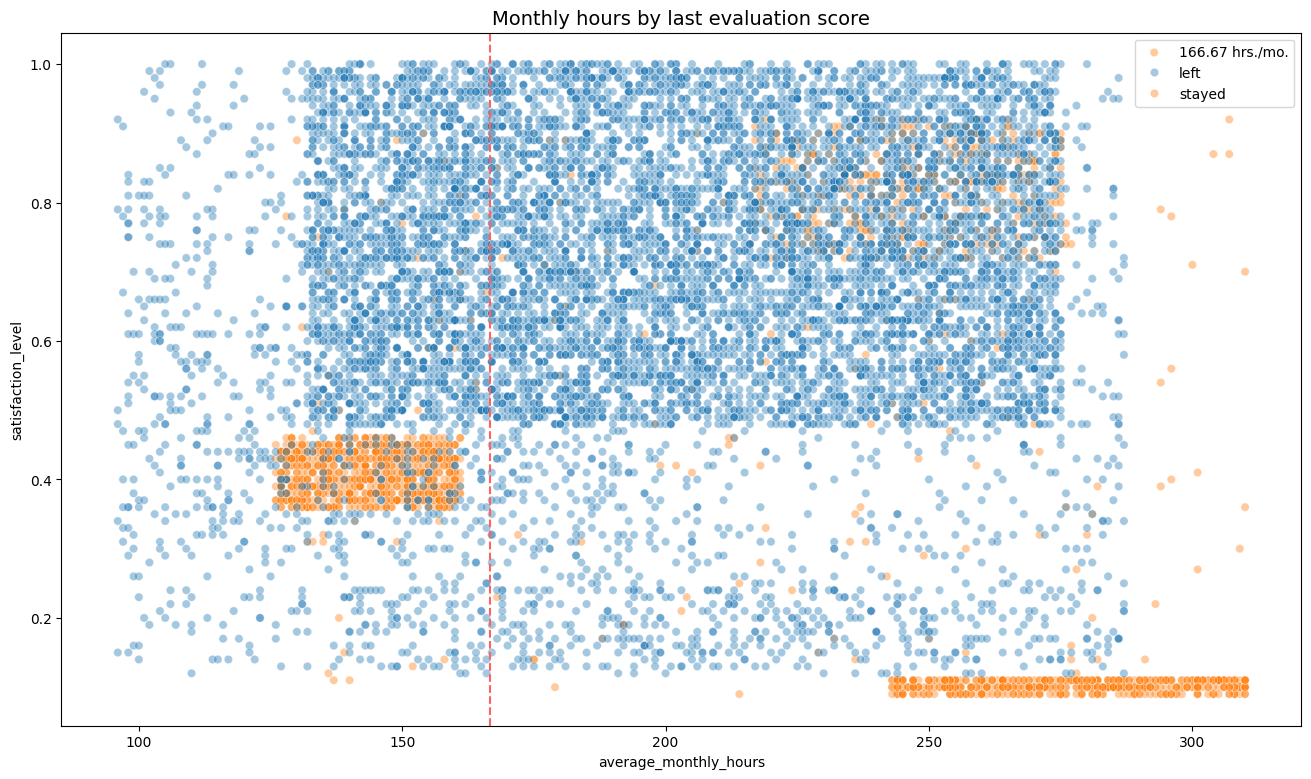

In [27]:
# Create a plot as needed 
# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, 
# comparing employees who stayed versus those who left
    
plt.figure(figsize=(16, 9))
sns.scatterplot(data=employeesDataNew, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

# 1) employees who worked 240–325 hrs/month their  satification level was close to 0 and they stayed!
# 2) employees who worked 210–280 hrs/month  their satisfaction levels range from 0.7–0.9
# 3) the employees who left worked 179-275 hrs/month their satisfaction level ranged from 0.5 to 1



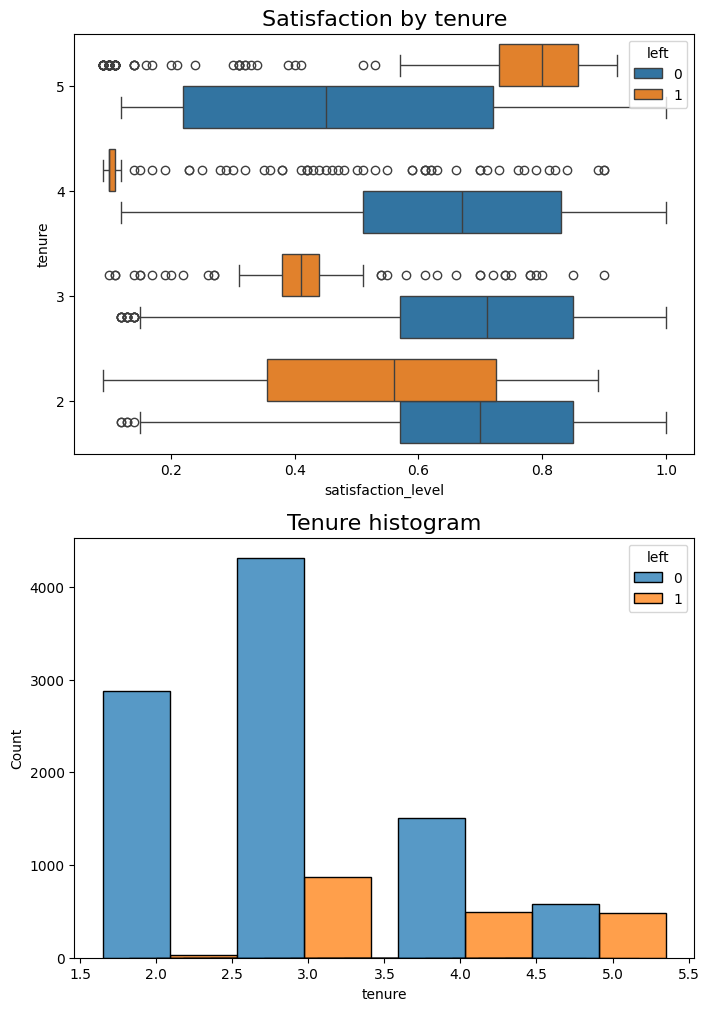

In [28]:
# Create a plot as needed 

# Set figure and axes
fig, ax = plt.subplots(2, 1, figsize = (8,12))

# Below is boxplot code showing distributions of satisfaction_level and tenure, comparing employees who stayed versus those who left
sns.boxplot(data=employeesDataNew, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='16')

# below is the histogram code showing distribution of tenure comparing employees who stayed versus those who left
tenure_stay = employeesDataNew[employeesDataNew['left']==0]['tenure']
tenure_left = employeesDataNew[employeesDataNew['left']==1]['tenure']
sns.histplot(data=employeesDataNew, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='16')

plt.show();

In [29]:
# There seems to be particularly little satisfaction among employees who worked for four years and departed.
# The longest-tenured employees didn't leave. They were just as satisfied as the more recent hires who stayed on staff
# The histogram indicates that the number of employees with longer tenure is relatively low. It is possible that these employees are higher-ranking and hence rewarded.

### let's determine the mean and median satisfaction ratings for both those who stayed and leaving staff.

In [30]:
# let's determine the mean and median satisfaction ratings for both those who stayed and leaving staff.
employeesDataNew.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

,mean,median
left,,
0,0.674999,0.69
1,0.419527,0.40


In [31]:
# Display counts for each department
employeesDataNew["department"].value_counts()

department
sales          2997
technical      2114
support        1721
IT              915
RandD           649
product_mng     641
marketing       617
accounting      583
hr              570
management      360
Name: count, dtype: int64

Text(0.5, 0, 'Department')

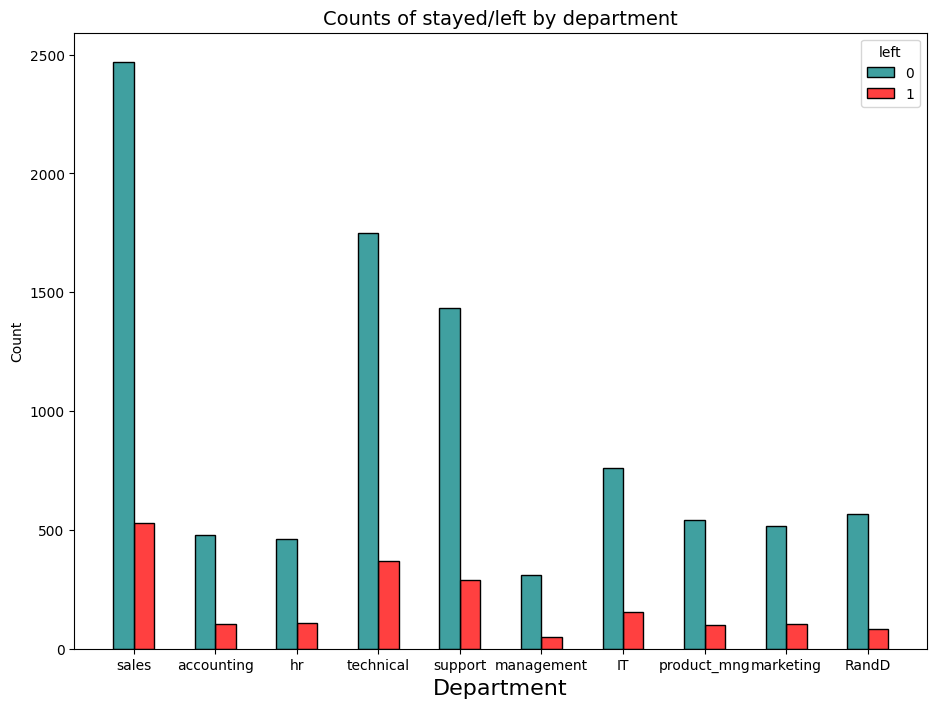

In [32]:
# # Create a stacked bart plot to visualize number of employees across department, comparing those who left with those who didn't
# In the legend, 0  represents employees who did not leave, 1 (red color) represents employees who left

# stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(11,8))
sns.histplot(data=employeesDataNew, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5,palette=custom_palette)
# plt.xticks(rotation=0z)
plt.title('Counts of stayed/left by department', fontsize=14);
plt.xlabel("Department",fontsize=16)

# The Sales Department have the highest employees  who stayed.
# There doesn't seem to be any noticeable variance between the percentage of departing employees and those remaining in any department.

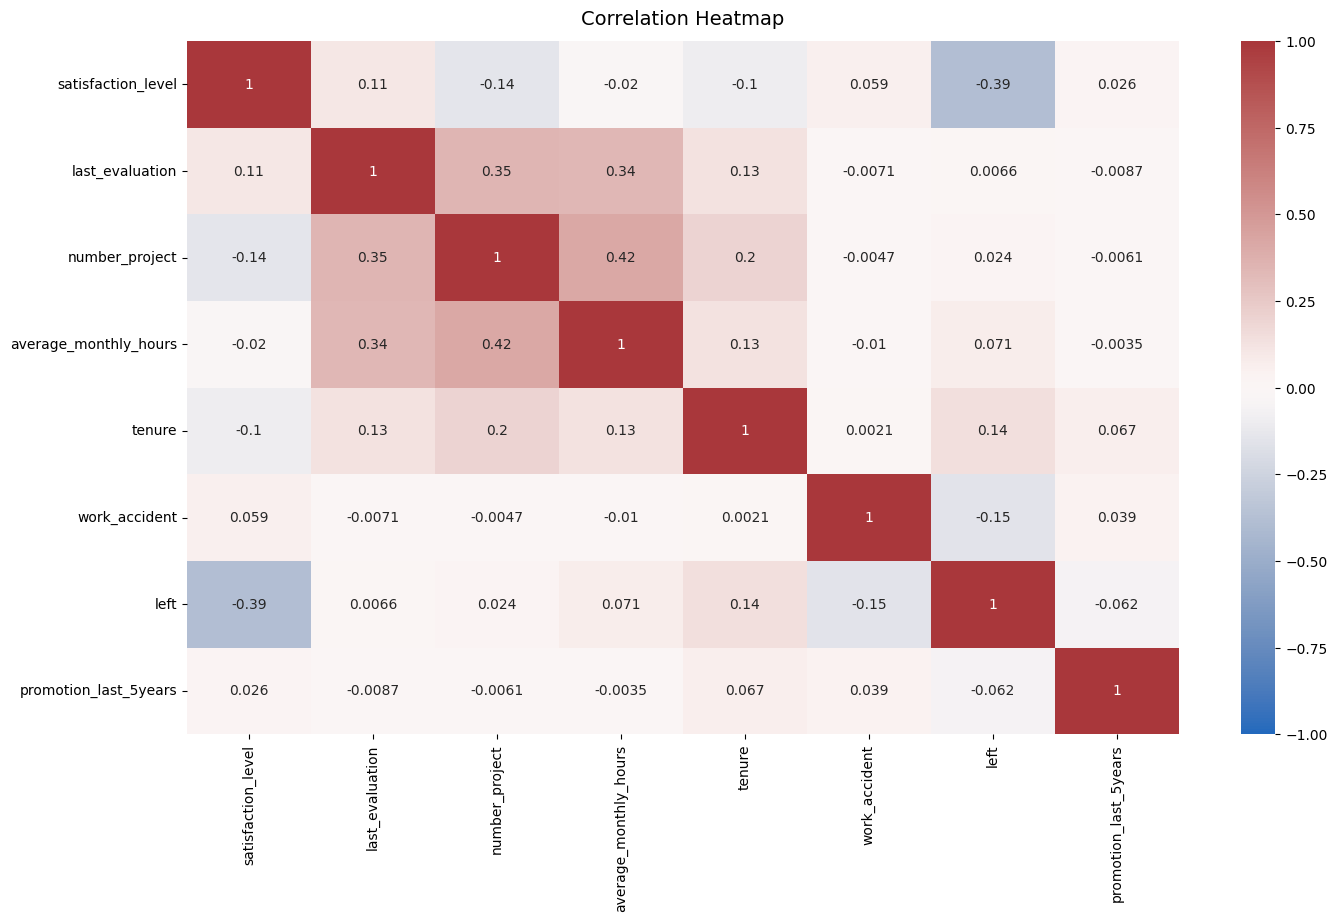

In [33]:
#  Lets Check for strong correlations between variables in the data.
# Plot a correlation heatmap
plt.figure(figsize=(16, 9))

#Remove non numeric columns
jstNumericDF = employeesData.select_dtypes(include=['float64', 'int64'])

heatmap = sns.heatmap(jstNumericDF.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

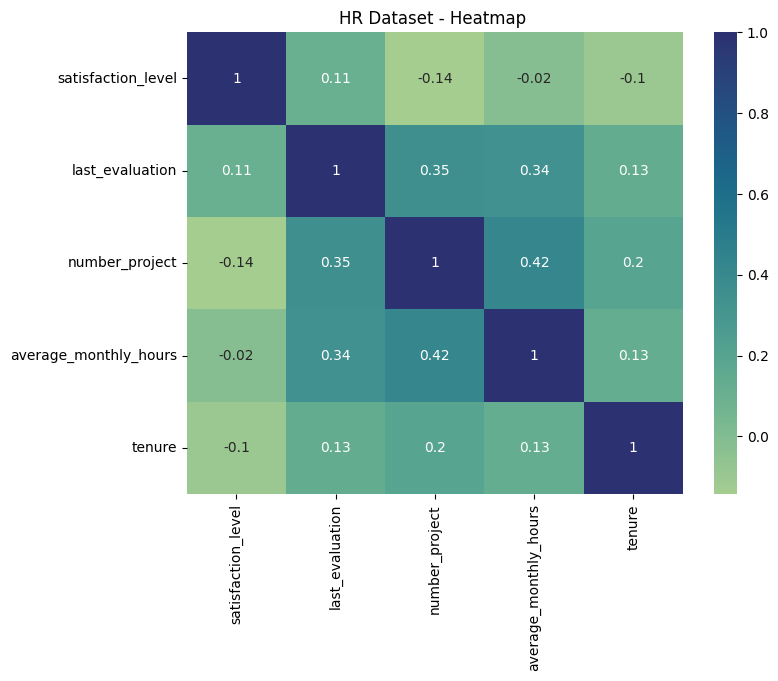

In [34]:
# To visualize how correlated variables are lets plot a heatmap
#  taking into account the factors we want to look for correlations between.
plt.figure(figsize=(8, 6))
sns.heatmap(employeesData[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('HR Dataset - Heatmap ')
plt.show()

In [35]:
# according to the correlation heatmap there is a negative link between an employee's
# satisfaction level  and their chances of leaving,
# and that there is a positive association between the number of projects, monthly hours, and assessment scores.

###  Feature Engineering

In [36]:
# Before Building model 
# First we need to encode the non-numeric variables before splitting the data. 
# Department column is categorical means we have to dummy it for modeling 
# & Salary is ordinal and lets convert the levels to numbers 0–2

In [37]:
# Copy the dataframe
hrData_enc = employeesDataNew.copy()

# Now lets encode the salary column as an ordinal numeric category
hrData_enc['salary'] = (
    hrData_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)
# lets now apply dummy encode to the department column
hrData_enc = pd.get_dummies(hrData_enc, drop_first=False)

# Our new dataframe looks like below
hrData_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


In [38]:
# We will convert average_monthly_hours into a binary column as overworked
empPreproccessed = hrData_enc.copy(deep=True)
empPreproccessed['overworked'] = hrData_enc['average_monthly_hours'] #  average monthly hours asssinged to `overworked` column
#166.67 is an ideal working hour if a person works 5 days a week & 8 hours a day.

# Lets inspect max and min average monthly hours values
print('Max hours worked:', empPreproccessed['overworked'].max())
print('Min hours worked:', empPreproccessed['overworked'].min())

# then now 
# When empPreproccessed['overworked'] > 175 then they are True for all values > 175 and False for all values < 175 
#  Using astype(int), all True values are changed to 1 and all False values to 0.

Max hours worked: 310
Min hours worked: 96


In [39]:
# lets define now overworked as working > 175 hrs/week
empPreproccessed['overworked'] = (empPreproccessed['overworked'] > 175).astype(int)
empPreproccessed['overworked'].head()

0    0
2    1
3    1
4    0
5    0
Name: overworked, dtype: int64

In [40]:
empPreproccessed = empPreproccessed.drop('average_monthly_hours', axis=1) # lets us now remove the `average_monthly_hours` column
empPreproccessed.head()

,satisfaction_level,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.38,0.53,2,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,0
2,0.11,0.88,7,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False,1
3,0.72,0.87,5,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False,1
4,0.37,0.52,2,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,0
5,0.41,0.50,2,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,0


In [41]:
empPreproccessed = empPreproccessed.drop('satisfaction_level', axis=1) # lets drop satisfaction_level as it doesnt have much correlation with any variable

In [42]:
empPreproccessed

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,0
2,0.88,7,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False,1
3,0.87,5,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False,1
4,0.52,2,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,0
5,0.50,2,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11985,0.64,4,3,0,0,0,1,False,False,False,False,False,False,False,True,False,False,1
11986,0.50,5,4,0,0,0,1,True,False,False,False,False,False,False,False,False,False,0
11987,0.79,4,4,0,0,0,1,False,False,False,False,False,False,True,False,False,False,1
11992,0.85,3,3,1,0,0,1,True,False,False,False,False,False,False,False,False,False,1


Total Employee who Stayed : 83.15%
and Total Employees who left : 16.85%


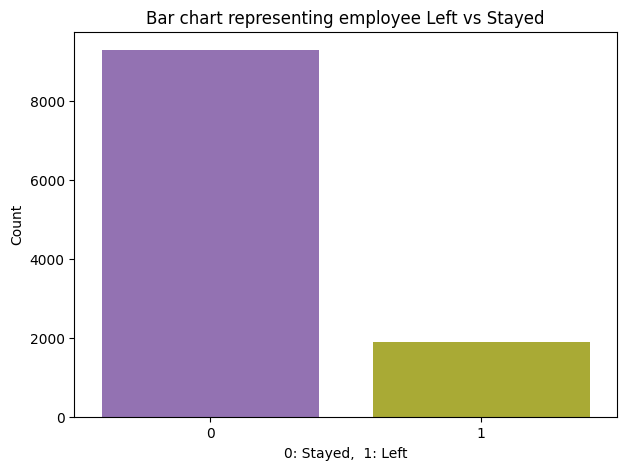

In [43]:
# WE  have a highly biased data if we observe the target variable lets analyse...
# lets Me Plot the barchart for Left VS Stayed
plt.figure(figsize=(7,5)) 
theClasscounts = empPreproccessed['left'].value_counts()
# sns.set_style('darkgrid') 

sns.barplot(x=theClasscounts.index,y=theClasscounts, palette=["C4", "C8"])
plt.title('Bar chart representing employee Left vs Stayed')
plt.ylabel('Count')
plt.xlabel('0: Stayed,  1: Left')

print(f"Total Employee who Stayed : {round(empPreproccessed['left'].value_counts()[0]/len(empPreproccessed)*100,2)}%")
print (f"and Total Employees who left : {round(empPreproccessed['left'].value_counts()[1]/len(empPreproccessed)*100,2)}%")

# Now as we can see only 16% of data consist of People who left.
# lets make it balanced data that will help us to build the model

In [44]:
# Over Sampling using Smote

In [45]:
smotX = empPreproccessed.drop('left', axis = 1) # dividing the datasets for SMOTE
smoty= empPreproccessed['left'] 

In [46]:
smoty.shape

(11167,)

In [47]:
smotX.shape

(11167, 17)

In [48]:
from imblearn.over_sampling import SMOTE

In [49]:
X_smote, y_smote = SMOTE().fit_resample(smotX,smoty) #implementing smote

In [50]:
y_smote.value_counts()

X_smote.shape

(18570, 17)

In [51]:
# her we will Split the data into training set and testing set.

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size = 0.3, random_state = 42)

# Logistic Model Using SKLEARN

In [52]:
# Create and fit a logistic regression model using the training set of data.
skLernLogisticModel = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)


In [53]:
# Use the logistic regression model to get predictions on the test set
y_pred = skLernLogisticModel.predict(X_test)

In [54]:
# Model Evaluation
#Let find out our accuracy
x_train_prediction =  skLernLogisticModel.predict(X_train)
training_data_accuracy = accuracy_score(y_train,x_train_prediction)

In [55]:
print(f'The accuracy score on our training data of our logistic using skLearn model is: {training_data_accuracy} ')

The accuracy score on our training data of our logistic using skLearn model is: 0.8079852296330488 


In [56]:
# Model Evaluation
#Let find out our accuracy

LogSk_prediction =  skLernLogisticModel.predict(X_test)
test_data_accuracy = accuracy_score(y_test,LogSk_prediction)

In [57]:
# Accuracy measures the proportion of data points that are correctly classified.
# F1-score is an aggregation of precision and recall.
print(f'The accuracy score on our test data of our logistic using skLearn model is: {test_data_accuracy} ')
print(f'The F1 score on our test data of our logistic using skLearn model is: {f1_score(y_test, LogSk_prediction)} ')

The accuracy score on our test data of our logistic using skLearn model is: 0.8014719080954945 
The F1 score on our test data of our logistic using skLearn model is: 0.8174917491749175 


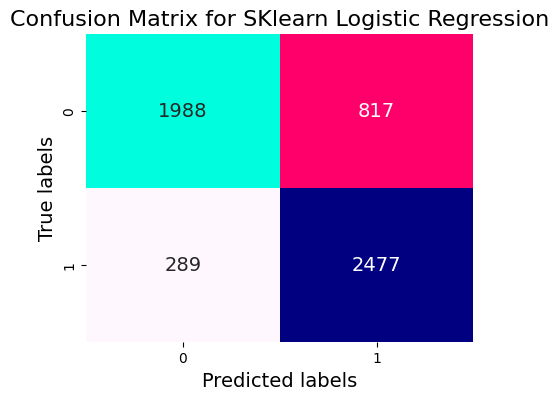

In [58]:
# Compute confusion matrix
def PlotConusionMatrix(y_test, pred):
    cnfsnMatrx = confusion_matrix(y_test, pred)

    # Lets plot the confusion matrix 
    plt.figure(figsize=(5, 4))
    sns.heatmap(cnfsnMatrx, annot=True, fmt='d', cmap='gist_ncar_r', cbar=False,annot_kws={"fontsize": 14})
    plt.xlabel('Predicted labels',fontsize=14)
    plt.ylabel('True labels',fontsize=14)
    plt.title('Confusion Matrix for SKlearn Logistic Regression',fontsize=16)

    plt.show()

PlotConusionMatrix(y_test,LogSk_prediction) 

# 2476 

In [59]:
f1_score(y_test, LogSk_prediction)

0.8174917491749175

In [60]:
# The upper-left quadrant displays the number of true negatives. 
# The upper-right quadrant displays the number of false positives.
# The bottom-left quadrant displays the number of false negatives.
# The bottom-right quadrant displays the number of true positives

In [61]:
# Defining New Dict variables to store all out accuracy & F1 scores.
Accuracies = {}
F1Scores = {}

Accuracies['sklearn_Logis']= accuracy_score(y_test, LogSk_prediction)
F1Scores['sklearn_Logis']= f1_score(y_test, LogSk_prediction)

In [62]:
# Create classification report for logistic regression model
report_target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, LogSk_prediction, target_names=report_target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.87      0.71      0.78      2805
    Predicted would leave       0.75      0.90      0.82      2766

                 accuracy                           0.80      5571
                macro avg       0.81      0.80      0.80      5571
             weighted avg       0.81      0.80      0.80      5571



In [63]:
#According to the classification report mentioned above, the logistic regression model 
# produced results with an accuracy of 82%, a recall of 82%, a f1-score of 80% (all weighted averages),
#and a precision of 79%. The ratings are much lower, though, if predicting staff attrition is 
# the most crucial factor.

# Logistic Model Using XGBOOST

In [64]:
# Using Xboost Package for building the logistic regression
from xgboost import XGBClassifier

# Create an instance of the XGBClassifier
XGB_LogisModel = XGBClassifier(objective='binary:logistic')

# Here I am Fitting the model using XGBOOST
XGB_LogisModel.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [65]:
# Make class predictions
XGB_Logis_pred = XGB_LogisModel.predict(X_test)
XGB_Logis_pred                       


array([1, 1, 0, ..., 1, 0, 1])

In [66]:
# Predicting Probabilities

# The predict_proba() function returns the probabilities for each class.
y_XGB_Logis_pred_proba = XGB_LogisModel.predict_proba(X_test)
y_XGB_Logis_pred_proba

array([[1.3652682e-02, 9.8634732e-01],
       [3.0755997e-04, 9.9969244e-01],
       [8.1137145e-01, 1.8862857e-01],
       ...,
       [7.3229074e-03, 9.9267709e-01],
       [9.6730369e-01, 3.2696284e-02],
       [4.0257573e-03, 9.9597424e-01]], dtype=float32)

In [67]:
# The left column is the probability that the instance belongs to the class (0) and the right column is the probability that it belongs to the class (1).

In [68]:
# Calculate accuracy
print(f'The accuracy score on our test data of our logistic using XGboost model is: {accuracy_score(y_test, XGB_Logis_pred)} ')
print(f'The F1 score on our test data of our logistic using XGboost model is: {f1_score(y_test, LogSk_prediction)} ')

The accuracy score on our test data of our logistic using XGboost model is: 0.9594327768802728 
The F1 score on our test data of our logistic using XGboost model is: 0.8174917491749175 


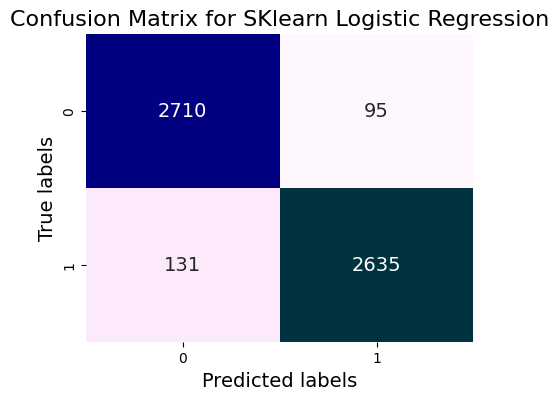

In [69]:
# Compute Function for confusion matrix
def PlotConusionMatrix(y_test, pred):
    cnfsnMatrx = confusion_matrix(y_test, pred)

    # Lets plot the confusion matrix 
    plt.figure(figsize=(5, 4))
    sns.heatmap(cnfsnMatrx, annot=True, fmt='d', cmap='gist_ncar_r', cbar=False,annot_kws={"fontsize": 14})
    plt.xlabel('Predicted labels',fontsize=14)
    plt.ylabel('True labels',fontsize=14)
    plt.title('Confusion Matrix for SKlearn Logistic Regression',fontsize=16)

    plt.show()

PlotConusionMatrix(y_test,XGB_Logis_pred) 

# The model predicted successfully that 2627  left the company but missed 139 of them
# also model predicted 2714 stayed with company but missed 91 of them

In [70]:
# storing all accuracy & F1 scores for later use

Accuracies['XGB_Logis']= accuracy_score(y_test, XGB_Logis_pred)
F1Scores['XGB_Logis']= f1_score(y_test, XGB_Logis_pred)

In [71]:
print(Accuracies)
print(F1Scores)

{'sklearn_Logis': 0.8014719080954945, 'XGB_Logis': 0.9594327768802728}
{'sklearn_Logis': 0.8174917491749175, 'XGB_Logis': 0.9588791848617176}


In [72]:
# Create classification report for logistic regression model
report_target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, XGB_Logis_pred, target_names=report_target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.95      0.97      0.96      2805
    Predicted would leave       0.97      0.95      0.96      2766

                 accuracy                           0.96      5571
                macro avg       0.96      0.96      0.96      5571
             weighted avg       0.96      0.96      0.96      5571



# Decision Tree using SKLEARN

In [73]:
# Below  we will now construct a decision tree model 
# and set up cross-validated grid-search to exhuastively search for the best model parameters.

# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Instantiate GridSearch
Detree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [74]:
# Fit the decision tree model to the training data.    
Detree1.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [75]:
# Identify the optimal values for the decision tree parameters.
# Check best parameters
Detree1.best_params_

{'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [76]:
#Now let's determine whose AUC (Area Under the ROC Curve) score the decision tree model produced on the training data
# Check best AUC score on CV
Detree1.best_score_

0.9707694944719067

In [77]:
decTree_Prediction = Detree1.predict(X_test)

In [78]:
accuracy = accuracy_score(y_test,decTree_Prediction)
print(f'The accuracy score on our test data of our Decision tree using Sklearn library is: {accuracy_score(y_test, decTree_Prediction)} ')
print(f'The F1 score on our test data of our Decision Tree using Sklearn library is: {f1_score(y_test, decTree_Prediction)} ')

The accuracy score on our test data of our Decision tree using Sklearn library is: 0.9488422186322025 
The F1 score on our test data of our Decision Tree using Sklearn library is: 0.9479642139857586 


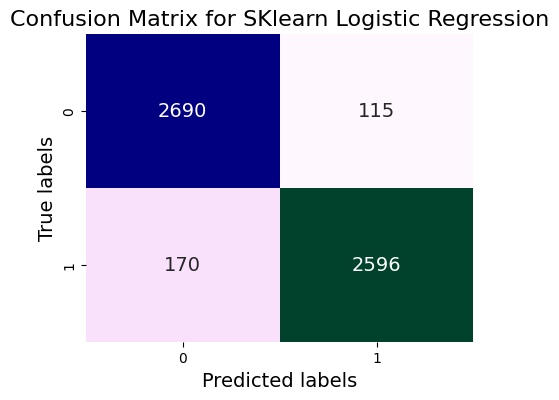

In [79]:
# Compute confusion matrix
def PlotConusionMatrix(y_test, pred):
    cnfsnMatrx = confusion_matrix(y_test, pred)

    # Lets plot the confusion matrix 
    plt.figure(figsize=(5, 4))
    sns.heatmap(cnfsnMatrx, annot=True, fmt='d', cmap='gist_ncar_r', cbar=False,annot_kws={"fontsize": 14})
    plt.xlabel('Predicted labels',fontsize=14)
    plt.ylabel('True labels',fontsize=14)
    plt.title('Confusion Matrix for SKlearn Logistic Regression',fontsize=16)

    plt.show()

PlotConusionMatrix(y_test,decTree_Prediction) 

# The model predicted successfully that 2594 left the company but missed 172 of them
# also model predicted 2669 stayed with company but missed 136 of them

In [80]:
# Defining New Dict variables to store all out accuracy & F1 scores.
Accuracies['sklearn_DecTree']= accuracy_score(y_test, decTree_Prediction)
F1Scores['sklearn_DecTree']= f1_score(y_test, decTree_Prediction)

In [81]:
F1Scores 

{'sklearn_Logis': 0.8174917491749175,
 'XGB_Logis': 0.9588791848617176,
 'sklearn_DecTree': 0.9479642139857586}

In [82]:
Accuracies

{'sklearn_Logis': 0.8014719080954945,
 'XGB_Logis': 0.9594327768802728,
 'sklearn_DecTree': 0.9488422186322025}

## Decision Tree using XBoost Package

In [83]:
### Decision Tree using XBoost Package
from sklearn.datasets import load_iris


In [84]:
# Instantiate XGBClassifier (Decision Tree model)
XGB_Dectree= XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

# Train the model on the training data
XGB_Dectree.fit(X_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [85]:
# Make predictions on the test data
XGB_Dectreepred = XGB_Dectree.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test,XGB_Dectreepred)

report = classification_report(y_test, XGB_Dectreepred)

Accuracies['XGB_DecTree'] = accuracy
F1Scores['XGB_DecTree'] = f1_score(y_test, XGB_Dectreepred)

print(f'The accuracy score on our test data of our Decision tree using XGboost library is: {accuracy_score(y_test, XGB_Dectreepred)} ')
print(f'The F1 score on our test data of our Decision Tree using XGboost library is: {f1_score(y_test, XGB_Dectreepred)} ')

print("Classification Report:\n", report)

The accuracy score on our test data of our Decision tree using XGboost library is: 0.9623047926763597 
The F1 score on our test data of our Decision Tree using XGboost library is: 0.9616508400292184 
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      2805
           1       0.97      0.95      0.96      2766

    accuracy                           0.96      5571
   macro avg       0.96      0.96      0.96      5571
weighted avg       0.96      0.96      0.96      5571



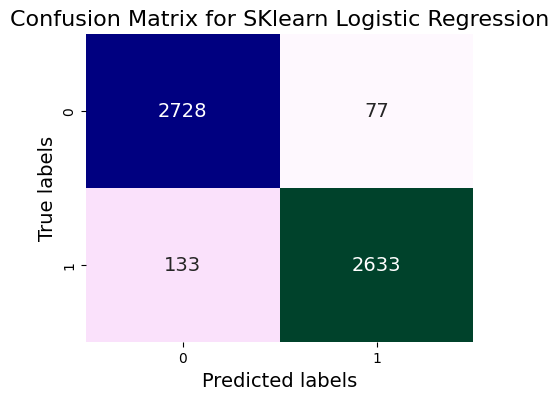

In [86]:
# Compute confusion matrix
def PlotConusionMatrix(y_test, pred):
    cnfsnMatrx = confusion_matrix(y_test, pred)

    # Lets plot the confusion matrix 
    plt.figure(figsize=(5, 4))
    sns.heatmap(cnfsnMatrx, annot=True, fmt='d', cmap='gist_ncar_r', cbar=False,annot_kws={"fontsize": 14})
    plt.xlabel('Predicted labels',fontsize=14)
    plt.ylabel('True labels',fontsize=14)
    plt.title('Confusion Matrix for SKlearn Logistic Regression',fontsize=16)

    plt.show()

PlotConusionMatrix(y_test,XGB_Dectreepred) 

# The model predicted successfully that 2641  left the company but missed 125 of them
# also model predicted 2712 stayed with company but missed 93 of them

In [87]:
# Some of the other scores fell. That's to be expected given fewer
# features were taken into account of the model. Still, the scores are very good.

In [88]:
Accuracies


{'sklearn_Logis': 0.8014719080954945,
 'XGB_Logis': 0.9594327768802728,
 'sklearn_DecTree': 0.9488422186322025,
 'XGB_DecTree': 0.9623047926763597}

In [89]:
F1Scores

{'sklearn_Logis': 0.8174917491749175,
 'XGB_Logis': 0.9588791848617176,
 'sklearn_DecTree': 0.9479642139857586,
 'XGB_DecTree': 0.9616508400292184}

# Comparing Scores of all the Model.

In [90]:
print("Model Accuracies:")
for mname, accuracy in Accuracies.items():
    print(f"{mname}: {accuracy:.4f}")

Model Accuracies:
sklearn_Logis: 0.8015
XGB_Logis: 0.9594
sklearn_DecTree: 0.9488
XGB_DecTree: 0.9623


In [91]:
print("Model F1 Scores:")
for mn, f1Score in F1Scores.items():
    print(f"{mn}: {f1Score:.4f}")

Model F1 Scores:
sklearn_Logis: 0.8175
XGB_Logis: 0.9589
sklearn_DecTree: 0.9480
XGB_DecTree: 0.9617


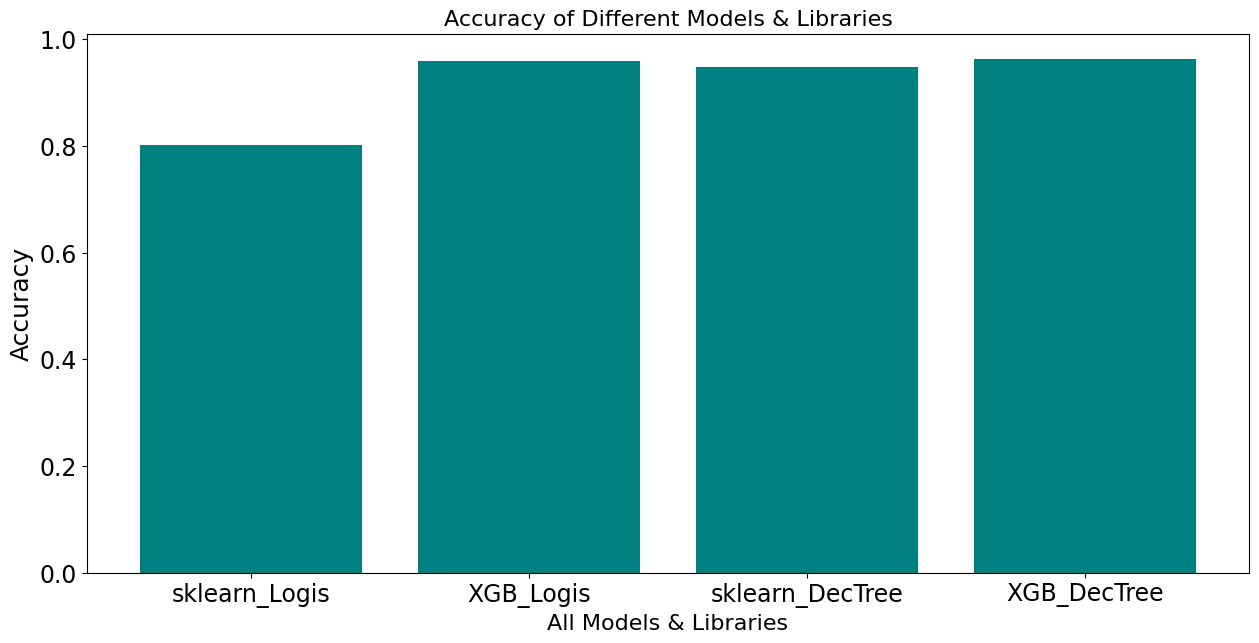

In [92]:
# Below are model names and accuracy scores
TwiAnmodelNames = list(Accuracies.keys())   # getting the key's from dict
TwiAnaccuracyScores = list(Accuracies.values())  # getting the values's from dict

# Plot a bar graph to visulise the accuracy scores
plt.figure(figsize=(15, 7))
plt.bar(TwiAnmodelNames, TwiAnaccuracyScores, color='teal')
plt.xlabel('All Models & Libraries', fontsize=16)
plt.ylabel('Accuracy', fontsize=18)
plt.title('Accuracy of Different Models & Libraries', fontsize=16)
# plt.ylim(0.92, 1)  # Set y-axis limits to better visualize differences
plt.xticks(rotation=0, fontsize=17) 
plt.yticks(rotation=0, fontsize=17)
plt.show()

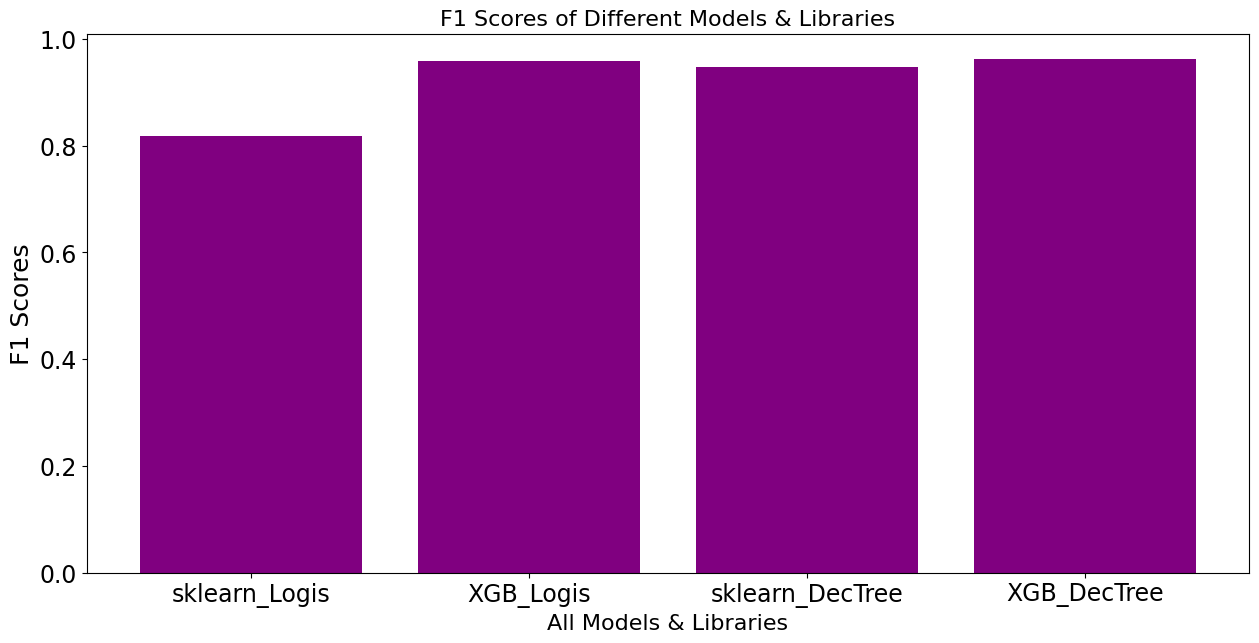

In [93]:
# Below are model names and accuracy scores
TwiAnmodelNames = list(F1Scores.keys())
TwiAnF1Scores = list(F1Scores.values())


# Plot a bar graph to visulise the accuracy scores
plt.figure(figsize=(15, 7))
plt.bar(TwiAnmodelNames, TwiAnF1Scores, color='purple')
plt.xlabel('All Models & Libraries', fontsize=16)
plt.ylabel('F1 Scores', fontsize=18)
plt.title('F1 Scores of Different Models & Libraries', fontsize=16)
# plt.ylim(0.92, 1)  # Set y-axis limits to better visualize differences
plt.xticks(rotation=0, fontsize=17) 
plt.yticks(rotation=0, fontsize=17)
plt.show()

In [94]:
# Check best params
Detree1.best_params_

{'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [95]:
# Check best AUC score on CV
Detree1.best_score_

0.9707694944719067

In [96]:
# DECISION TREE FEATURE IMPORTANCE 
# You can also get feature importance from decision trees
Detree1_importances = pd.DataFrame(Detree1.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X_smote.columns
                                )
Detree1_importances = Detree1_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
Detree1_importances = Detree1_importances[Detree1_importances['gini_importance'] != 0]
Detree1_importances


,gini_importance
tenure,0.434968
number_project,0.276532
last_evaluation,0.219391
overworked,0.046869
salary,0.005868
department_support,0.004150
work_accident,0.004145
department_sales,0.002591
department_technical,0.002512
department_IT,0.001776


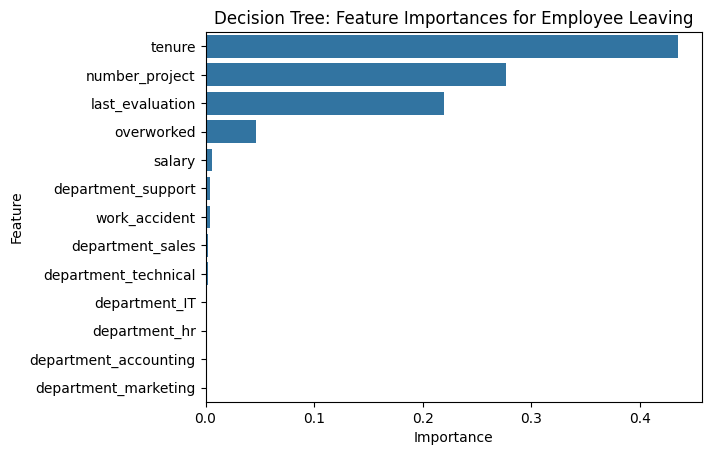

In [97]:
# You can then create a barplot to visualize the decision tree feature importances.
sns.barplot(data=Detree1_importances, x="gini_importance", y=Detree1_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

In [98]:
# The barplot above illustrates how the decision tree model assigns the greatest values to the following factors: tenure, number of projects, last evaluation, and overworked, in that order. 
# These are the most helpful factors for anticipating the result variable, left.